# Reddit Wordcloud

Wordcloud created from r/Television top posts in the past year to give some degree of knowledge as to what TV watchers on Reddit talk about

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import praw
from praw.models import MoreComments
import string
import config


In [2]:
reddit = praw.Reddit(
    client_id=config.client_id,
    client_secret=config.client_secret,
    password=config.password,
    user_agent=config.user_agent,
    username=config.username,
)

Version 7.7.0 of praw is outdated. Version 7.7.1 was released Tuesday July 11, 2023.


In [3]:
subreddit = reddit.subreddit('television')

In [4]:
comment_words = ''
for post in subreddit.top(time_filter='year', limit = 150):
    title = post.title
    punc = '''!()-[];:'"\,<>./?@#$%^&*_~'''
    for ele in title:
        if ele in punc:
            title = title.replace(ele, "")
    tokens = title.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    longtokens = []
    for token in tokens:
        if len(token) > 3:
            longtokens.append(token)
        
    comment_words += " ".join(longtokens)+" "

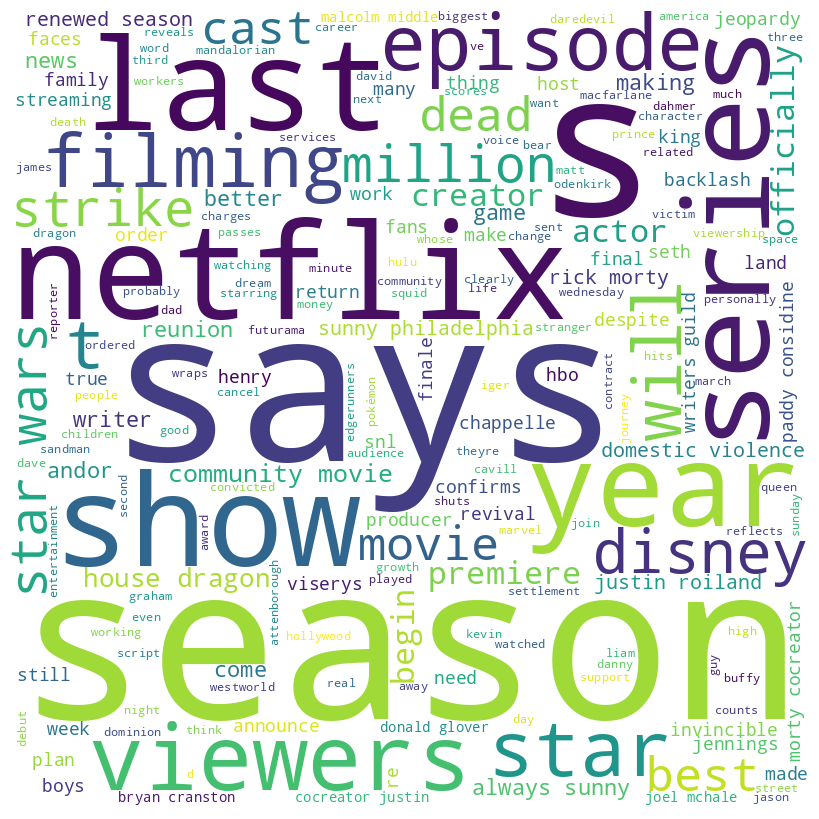

In [5]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()